<a href="https://colab.research.google.com/github/RenatoCoronado99/Machine-Learning/blob/main/Dataset_LiveDisorders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.metrics import confusion_matrix,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
import sys
import seaborn as sns

In [ ]:
def plot_corr(dataset):
  correlation=dataset.corr()
  plt.figure(figsize=(15,10))
  sns.heatmap(correlation,annot=True,cmap='coolwarm')
def funcion_lasso(X,y,dataset):
  lass = LassoCV()
  lass.fit(X,y)
  coeficientes = pd.Series(lass.coef_,index=X.columns)
  print(coeficientes)
  coefsort = coeficientes.sort_values()
  plt.rcParams['figure.figsize'] == (8.0,10.0)
  coefsort.plot(kind='barh')
  plt.title("features")
def CategorizandoValores(vdrink):
  if vdrink < 3:
    return 0
  else:
    return 1
def plot_corr(dataset):
  correlation=dataset.corr()
  plt.figure(figsize=(15,10))
  sns.heatmap(correlation,annot=True,cmap='coolwarm')
def Afinando_valores_dataset(dataset):
  dataset["drinks"] = dataset["drinks"].apply(CategorizandoValores)
  print(LiveDisorders.groupby(["drinks"]).size())
  return dataset

In [ ]:
datasetOriginal_bupa = pd.read_csv("bupa.data",names = ["mcv","alkphos","sgpt","sgot","gmmagt","drinks","selector"])
listDropLiveDisorders=['selector']
#LungCancer = pd.read_csv("lung-cancer.data")
LiveDisorders = datasetOriginal_bupa.drop(listDropLiveDisorders, axis="columns")
#print(LungCancer)
print(LiveDisorders)

     mcv  alkphos  sgpt  sgot  gmmagt  drinks
0     85       92    45    27      31     0.0
1     85       64    59    32      23     0.0
2     86       54    33    16      54     0.0
3     91       78    34    24      36     0.0
4     87       70    12    28      10     0.0
..   ...      ...   ...   ...     ...     ...
340   99       75    26    24      41    12.0
341   96       69    53    43     203    12.0
342   98       77    55    35      89    15.0
343   91       68    27    26      14    16.0
344   98       99    57    45      65    20.0

[345 rows x 6 columns]


In [ ]:
LiveDisorders = Afinando_valores_dataset(LiveDisorders)
y =  LiveDisorders["drinks"]
X = LiveDisorders.iloc[:, 0:5]
print(LiveDisorders)

drinks
0    169
1    176
dtype: int64
     mcv  alkphos  sgpt  sgot  gmmagt  drinks
0     85       92    45    27      31       0
1     85       64    59    32      23       0
2     86       54    33    16      54       0
3     91       78    34    24      36       0
4     87       70    12    28      10       0
..   ...      ...   ...   ...     ...     ...
340   99       75    26    24      41       1
341   96       69    53    43     203       1
342   98       77    55    35      89       1
343   91       68    27    26      14       1
344   98       99    57    45      65       1

[345 rows x 6 columns]


In [ ]:
X


,mcv,alkphos,sgpt,sgot,gmmagt
0,85,92,45,27,31
1,85,64,59,32,23
2,86,54,33,16,54
3,91,78,34,24,36
4,87,70,12,28,10
...,...,...,...,...,...
340,99,75,26,24,41
341,96,69,53,43,203
342,98,77,55,35,89
343,91,68,27,26,14


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
340    1
341    1
342    1
343    1
344    1
Name: drinks, Length: 345, dtype: int64

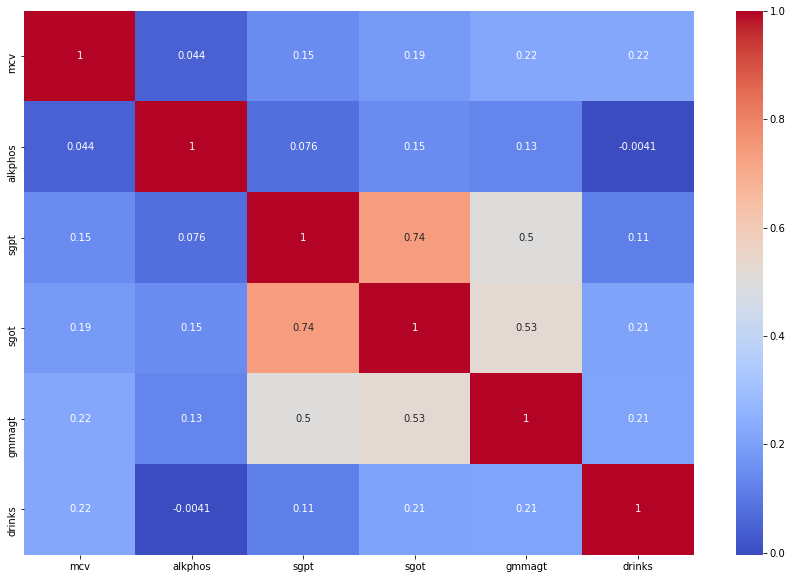

In [ ]:
#Existe mucha correlación entre sgpt sgot
##Existe correlacion entre sgpt y gmmagt
###Existe correlacion entre sgot y gmmagt
plot_corr(LiveDisorders)

mcv        0.019162
alkphos   -0.001363
sgpt      -0.003315
sgot       0.010226
gmmagt     0.001783
dtype: float64


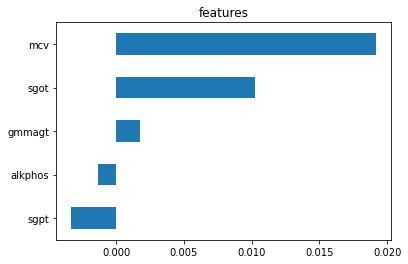

In [ ]:
funcion_lasso(X,y,LiveDisorders)

In [ ]:
def RFE(model):
  rfecv = RFECV(estimator= model , scoring= 'roc_auc')
  X_new = rfecv.transform(X,y)
  print(X_new)

In [ ]:
def logisticR(X,y):
  X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2)
  LogisticR = LogisticRegression()
  LogisticR.fit(X_train,y_train)
  prediction = LogisticR.predict(X_test)
  print("Predicción train -> ", prediction)
  ###Matriz de confusión
  cm = confusion_matrix(y_test,prediction)
  score = LogisticR.score(X_test,y_test)
  recall  = recall_score(y_test,prediction)
  f1 = f1_score(y_test,prediction)
  cvs = cross_val_score(LogisticR,X,y,cv=10)
  print(cm)
  print("Score -> ", score)
  print("Cross validation -> ",cvs)
  ## tp / (tp + fn)
  
  ##tp/ (tp+fp)
  
  print("Precisión: %0.2f (+/- % 0.2f)" % (score.mean(),score.std()*2))
  print("Precisión Cross validation : %0.2f (+/- % 0.2f)" % (cvs.mean(),cvs.std()*2))

  print("f1 Score -> ", f1)
  print("El modelo solo es capaz de identificar el %0.2f " %recall)

  print("Recall Score -> ", recall)
  #RFE(LogisticR)
logisticR(X,y)

Predicción train ->  [0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1
 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1]
[[22  9]
 [17 21]]
Score ->  0.6231884057971014
Cross validation ->  [0.54285714 0.42857143 0.65714286 0.62857143 0.62857143 0.73529412
 0.5        0.58823529 0.70588235 0.70588235]
Precisión: 0.62 (+/-  0.00)
Precisión Cross validation : 0.61 (+/-  0.19)
f1 Score ->  0.6176470588235295
El modelo solo es capaz de identificar el 0.55 
Recall Score ->  0.5526315789473685


In [ ]:
##Eliminado variables no significativas basnadose en analisis de correlación
listDropLiveDisorders=['selector',"sgot"]
LiveDisorders_Correlacion = datasetOriginal_bupa.drop(listDropLiveDisorders, axis="columns")
LiveDisorders_Correlacion = Afinando_valores_dataset(LiveDisorders_Correlacion)
print(LiveDisorders_Correlacion)
y =  LiveDisorders_Correlacion["drinks"]
X = LiveDisorders_Correlacion.iloc[:, 0:4]
X

drinks
0    169
1    176
dtype: int64
     mcv  alkphos  sgpt  gmmagt  drinks
0     85       92    45      31       0
1     85       64    59      23       0
2     86       54    33      54       0
3     91       78    34      36       0
4     87       70    12      10       0
..   ...      ...   ...     ...     ...
340   99       75    26      41       1
341   96       69    53     203       1
342   98       77    55      89       1
343   91       68    27      14       1
344   98       99    57      65       1

[345 rows x 5 columns]


,mcv,alkphos,sgpt,gmmagt
0,85,92,45,31
1,85,64,59,23
2,86,54,33,54
3,91,78,34,36
4,87,70,12,10
...,...,...,...,...
340,99,75,26,41
341,96,69,53,203
342,98,77,55,89
343,91,68,27,14


In [ ]:
logisticR(X,y)

Predicción train ->  [0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1]
[[21 14]
 [14 20]]
Score ->  0.5942028985507246
Cross validation ->  [0.51428571 0.34285714 0.68571429 0.68571429 0.51428571 0.70588235
 0.61764706 0.64705882 0.67647059 0.55882353]
Precisión: 0.59 (+/-  0.00)
Precisión Cross validation : 0.59 (+/-  0.22)
f1 Score ->  0.5882352941176471
El modelo solo es capaz de identificar el 0.59 
Recall Score ->  0.5882352941176471


In [ ]:
##Elimiando variables no significativas basandose en lasso
#listDropLiveDisorders=['selector','gmmagt']
listDropLiveDisorders=['selector','alkphos']
LiveDisorders_Lasso = datasetOriginal_bupa.drop(listDropLiveDisorders, axis="columns")
print(LiveDisorders_Lasso)
LiveDisorders_Lasso = Afinando_valores_dataset(LiveDisorders_Lasso)
y =  LiveDisorders_Lasso["drinks"]
X = LiveDisorders_Lasso.iloc[:, 0:4]



     mcv  sgpt  sgot  gmmagt  drinks
0     85    45    27      31     0.0
1     85    59    32      23     0.0
2     86    33    16      54     0.0
3     91    34    24      36     0.0
4     87    12    28      10     0.0
..   ...   ...   ...     ...     ...
340   99    26    24      41    12.0
341   96    53    43     203    12.0
342   98    55    35      89    15.0
343   91    27    26      14    16.0
344   98    57    45      65    20.0

[345 rows x 5 columns]
drinks
0    169
1    176
dtype: int64


In [ ]:
logisticR(X,y)

Predicción train ->  [1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0
 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1]
[[20 17]
 [12 20]]
Score ->  0.5797101449275363
Cross validation ->  [0.51428571 0.45714286 0.68571429 0.62857143 0.62857143 0.73529412
 0.5        0.64705882 0.70588235 0.67647059]
Precisión: 0.58 (+/-  0.00)
Precisión Cross validation : 0.62 (+/-  0.18)
f1 Score ->  0.5797101449275363
El modelo solo es capaz de identificar el 0.62 
Recall Score ->  0.625


**Recursive Feature Elimination**